In [3]:
from darkflow.net.build import TFNet
import cv2

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
options = {"model": "cfg/yolo.cfg", "load": "bin/yolo.weights", "threshold": 0.1}

In [7]:
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.016983509063720703s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep

In [15]:
imgcv = cv2.imread("./sample_img/sample_dog.jpg")
results = tfnet.return_predict(imgcv)
print(results)

[{'bottomright': {'x': 553, 'y': 466}, 'confidence': 0.8448341, 'label': 'bicycle', 'topleft': {'x': 81, 'y': 114}}, {'bottomright': {'x': 693, 'y': 167}, 'confidence': 0.79511166, 'label': 'truck', 'topleft': {'x': 462, 'y': 81}}, {'bottomright': {'x': 114, 'y': 124}, 'confidence': 0.27550778, 'label': 'motorbike', 'topleft': {'x': 59, 'y': 76}}, {'bottomright': {'x': 314, 'y': 551}, 'confidence': 0.12677637, 'label': 'cat', 'topleft': {'x': 139, 'y': 197}}, {'bottomright': {'x': 322, 'y': 539}, 'confidence': 0.7696115, 'label': 'dog', 'topleft': {'x': 136, 'y': 214}}]


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

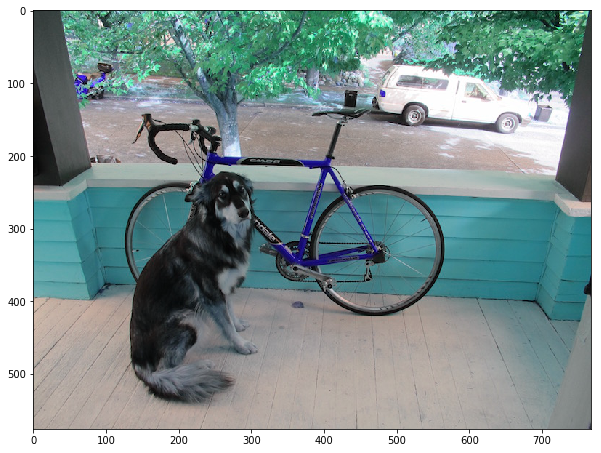

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(imgcv)

In [16]:
for result in results:
    print(result)

{'bottomright': {'x': 553, 'y': 466}, 'confidence': 0.8448341, 'label': 'bicycle', 'topleft': {'x': 81, 'y': 114}}
{'bottomright': {'x': 693, 'y': 167}, 'confidence': 0.79511166, 'label': 'truck', 'topleft': {'x': 462, 'y': 81}}
{'bottomright': {'x': 114, 'y': 124}, 'confidence': 0.27550778, 'label': 'motorbike', 'topleft': {'x': 59, 'y': 76}}
{'bottomright': {'x': 314, 'y': 551}, 'confidence': 0.12677637, 'label': 'cat', 'topleft': {'x': 139, 'y': 197}}
{'bottomright': {'x': 322, 'y': 539}, 'confidence': 0.7696115, 'label': 'dog', 'topleft': {'x': 136, 'y': 214}}


In [60]:
newImage = np.copy(imgcv)

for result in results:
    top_x = result['topleft']['x']
    top_y = result['topleft']['y']
    
    btm_x = result['bottomright']['x']
    btm_y = result['bottomright']['y']
    
    confidence = result['confidence']
    
    label = result['label']
    
    if confidence > 0.7:
        newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
        newImage = cv2.putText(newImage, label, (top_x, top_y), cv2.FONT_HERSHEY_DUPLEX, 1.3, (255,0,0), thickness=3)

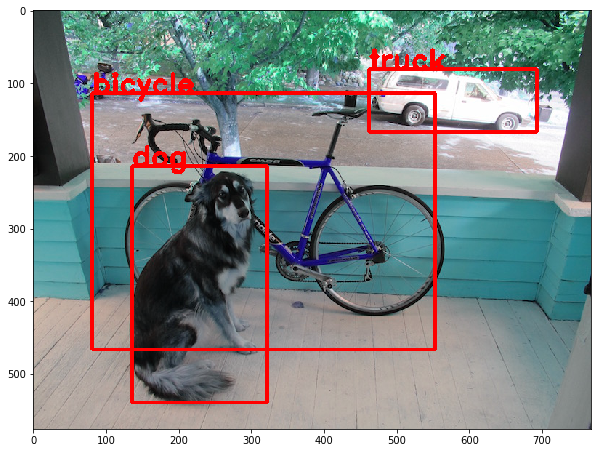

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(newImage)

In [90]:
imgcv = cv2.imread("./sample_img/test_image.jpg")
imgcv = cv2.cvtColor(imgcv, cv2.COLOR_BGR2RGB)

results = tfnet.return_predict(imgcv)
print(results)

[{'bottomright': {'x': 863, 'y': 672}, 'confidence': 0.18923074, 'label': 'person', 'topleft': {'x': 838, 'y': 650}}, {'bottomright': {'x': 1924, 'y': 703}, 'confidence': 0.361357, 'label': 'person', 'topleft': {'x': 1896, 'y': 657}}, {'bottomright': {'x': 2040, 'y': 708}, 'confidence': 0.26244593, 'label': 'person', 'topleft': {'x': 2022, 'y': 658}}, {'bottomright': {'x': 1116, 'y': 1210}, 'confidence': 0.7786705, 'label': 'person', 'topleft': {'x': 883, 'y': 554}}, {'bottomright': {'x': 1282, 'y': 1206}, 'confidence': 0.8163045, 'label': 'person', 'topleft': {'x': 1062, 'y': 554}}, {'bottomright': {'x': 1439, 'y': 1218}, 'confidence': 0.7650036, 'label': 'person', 'topleft': {'x': 1261, 'y': 573}}, {'bottomright': {'x': 1544, 'y': 1221}, 'confidence': 0.24508636, 'label': 'person', 'topleft': {'x': 1346, 'y': 575}}, {'bottomright': {'x': 1698, 'y': 1259}, 'confidence': 0.8152034, 'label': 'person', 'topleft': {'x': 1435, 'y': 543}}, {'bottomright': {'x': 1273, 'y': 869}, 'confidence'

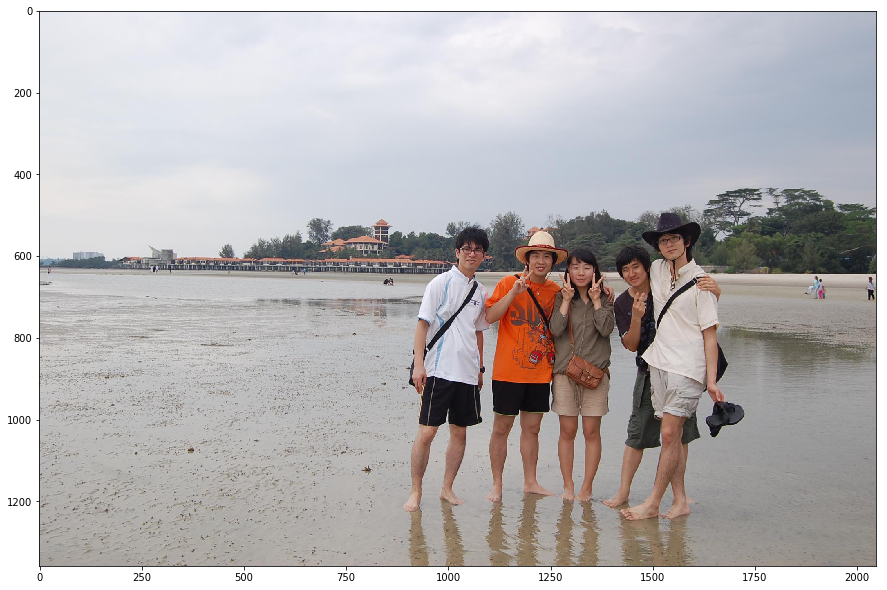

In [91]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(imgcv)

In [98]:
newImage = np.copy(imgcv)

for result in results:
    top_x = result['topleft']['x']
    top_y = result['topleft']['y']
    
    btm_x = result['bottomright']['x']
    btm_y = result['bottomright']['y']
    
    confidence = result['confidence']
    
    label = result['label']
    
    if confidence > 0.2:
        newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
        newImage = cv2.putText(newImage, label, (top_x, top_y), cv2.FONT_HERSHEY_DUPLEX, 1.3, (255,0,0), thickness=3)

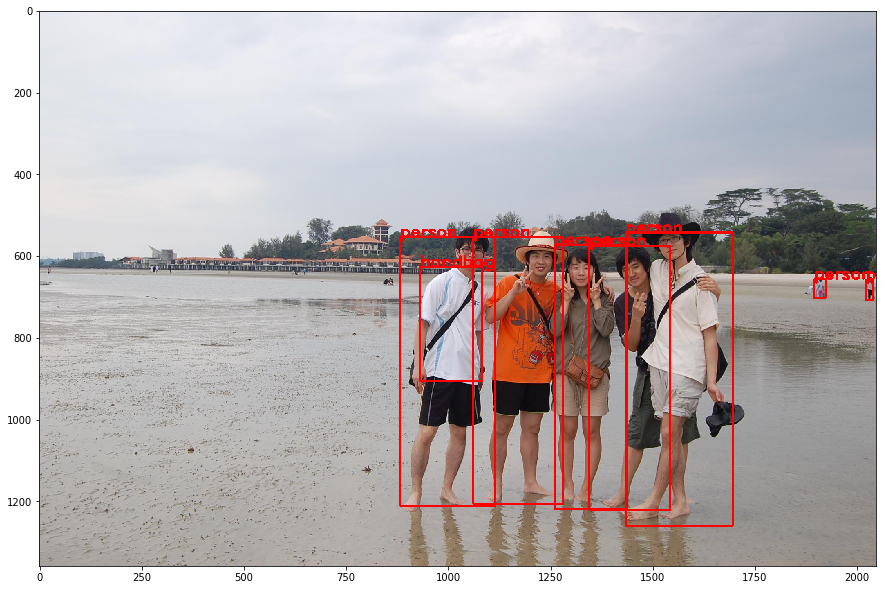

In [99]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(newImage)

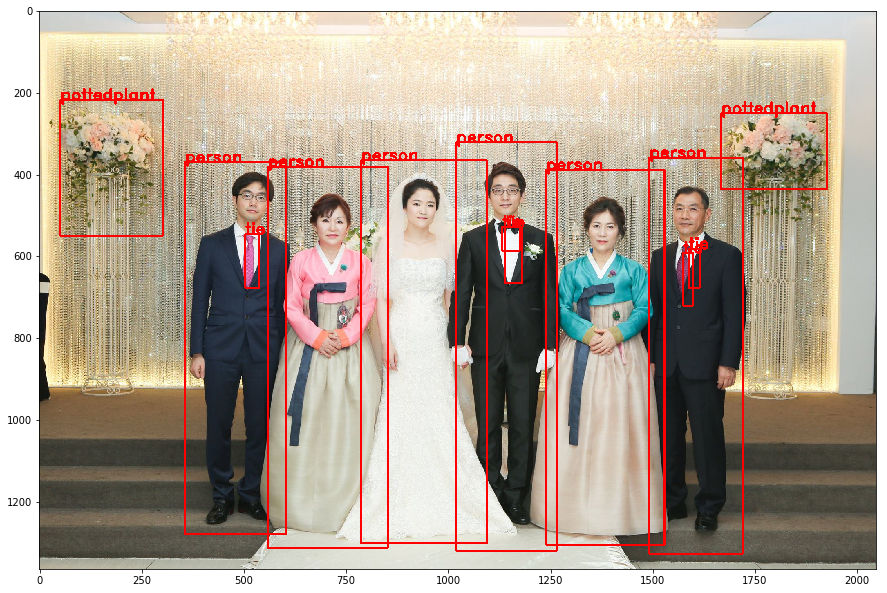

In [88]:
imgcv = cv2.imread("./sample_img/test_image2.jpg")
imgcv = cv2.cvtColor(imgcv, cv2.COLOR_BGR2RGB)

results = tfnet.return_predict(imgcv)

newImage = np.copy(imgcv)

for result in results:
    top_x = result['topleft']['x']
    top_y = result['topleft']['y']
    
    btm_x = result['bottomright']['x']
    btm_y = result['bottomright']['y']
    
    confidence = result['confidence']
    
    label = result['label']
    
#     if confidence > 0.5:
    newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
    newImage = cv2.putText(newImage, label, (top_x, top_y), cv2.FONT_HERSHEY_DUPLEX, 1.3, (255,0,0), thickness=3)
        
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(newImage)

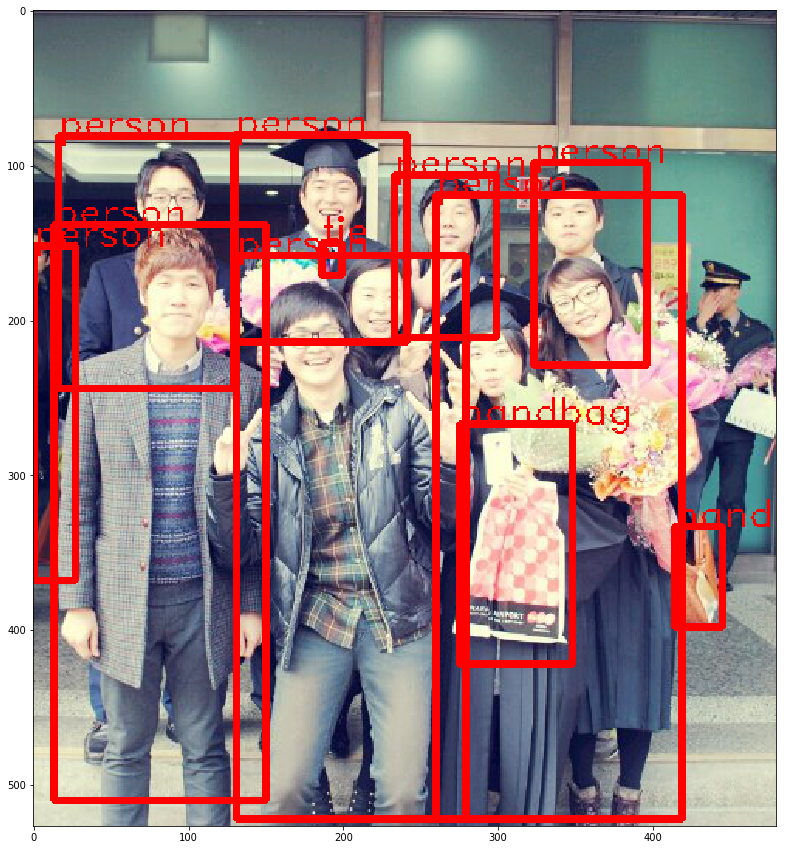

In [86]:
imgcv = cv2.imread("./sample_img/test_image3.jpg")
imgcv = cv2.cvtColor(imgcv, cv2.COLOR_BGR2RGB)

results = tfnet.return_predict(imgcv)

newImage = np.copy(imgcv)

for result in results:
    top_x = result['topleft']['x']
    top_y = result['topleft']['y']
    
    btm_x = result['bottomright']['x']
    btm_y = result['bottomright']['y']
    
    confidence = result['confidence']
    
    label = result['label']
    
    if confidence > 0.3:
        newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
        newImage = cv2.putText(newImage, label, (top_x, top_y), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), thickness=1)
        
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(newImage)